# Requirements

In [150]:
import pandas as pd

In [152]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [158]:
df = pd.read_csv('amazon_stock_price.csv')
df.sample(5)

,date,open,high,low,close,volume
1923,2005-01-06,2.0905,2.1125,2.0450,2.0525,174018000
2435,2007-01-22,1.8825,1.8950,1.8400,1.8475,166340000
2923,2008-12-26,2.6895,2.6975,2.5775,2.5890,136946000
3613,2011-09-22,11.2360,11.4395,10.9500,11.1615,165092000
2063,2005-07-28,2.1770,2.2905,2.1685,2.2840,502830000


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>],
       [<Axes: title={'center': 'volume'}>, <Axes: >]], dtype=object)

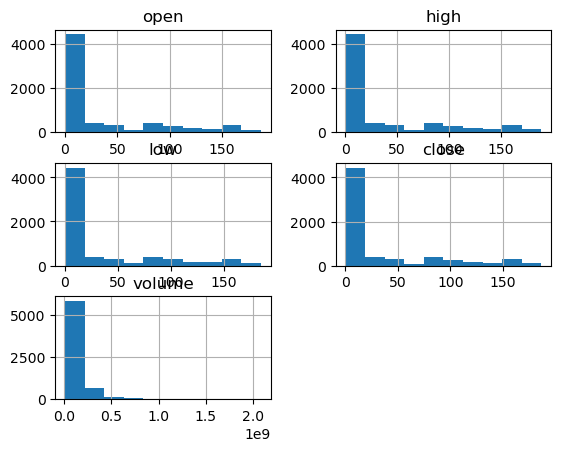

In [161]:
df.hist()

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [163]:
df['date'] = pd.to_datetime(df['date'])
# df['Year'] = df['date'].dt.year
# df['Month'] = df['date'].dt.month
# df['Day'] = df['date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6685 non-null   datetime64[ns]
 1   open    6685 non-null   float64       
 2   high    6685 non-null   float64       
 3   low     6685 non-null   float64       
 4   close   6685 non-null   float64       
 5   volume  6685 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 313.5 KB


In [166]:
df = df.sort_values(by='date')
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


In [168]:
features = ['open', 'high', 'low', 'volume']
for feature in features:
    for lag in range(1, 8):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
df.head() 

,date,open,high,low,close,volume,open_lag_1,open_lag_2,open_lag_3,open_lag_4,...,low_lag_5,low_lag_6,low_lag_7,volume_lag_1,volume_lag_2,volume_lag_3,volume_lag_4,volume_lag_5,volume_lag_6,volume_lag_7
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,0.1219,NaN,NaN,NaN,...,NaN,NaN,NaN,1.443120e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,0.0984,0.1219,NaN,NaN,...,NaN,NaN,NaN,2.940000e+08,1.443120e+09,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,0.0880,0.0984,0.1219,NaN,...,NaN,NaN,NaN,1.221360e+08,2.940000e+08,1.443120e+09,NaN,NaN,NaN,NaN
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,0.0865,0.0880,0.0984,0.1219,...,NaN,NaN,NaN,1.093440e+08,1.221360e+08,2.940000e+08,1.443120e+09,NaN,NaN,NaN


In [170]:
df = df.fillna(0)
df.isnull().sum()
drop_columns = ['open', 'high', 'low' ,'volume']
df = df.drop(drop_columns, axis=1)
df = df.drop('date', axis=1)
#prasaj za datetime
df.sample(3)

,close,open_lag_1,open_lag_2,open_lag_3,open_lag_4,open_lag_5,open_lag_6,open_lag_7,high_lag_1,high_lag_2,...,low_lag_5,low_lag_6,low_lag_7,volume_lag_1,volume_lag_2,volume_lag_3,volume_lag_4,volume_lag_5,volume_lag_6,volume_lag_7
5871,155.1485,160.4345,165.3610,160.1495,157.200,165.9000,174.2500,177.3500,160.8670,167.4945,...,155.5565,165.1500,174.3345,101880000.0,106614000.0,103774000.0,121884000.0,175636000.0,163222000.0,78630000.0
4071,15.1740,15.2195,15.3135,15.3485,15.365,15.3635,14.9345,14.7495,15.2895,15.3170,...,15.2175,14.9250,14.6050,59462000.0,61276000.0,40594000.0,53204000.0,44912000.0,90786000.0,80146000.0
6171,183.8285,178.3175,178.2360,176.9500,176.850,174.2500,175.6500,178.1935,185.2100,179.3625,...,172.3525,173.3735,173.1545,114070000.0,51206000.0,44342000.0,58594000.0,53788000.0,45288000.0,80548000.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [173]:
X = df.drop('close',axis=1)
Y = df['close']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [178]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,Y)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [180]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [183]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print(r2_score(Y_test,y_pred))

0.9998562304920622


In [185]:
print(mean_absolute_error(Y_test,y_pred))

0.24903477561705242


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [187]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [189]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [191]:
print(r2_score(Y_test,y_pred))

0.9999677364679781


In [193]:
print(mean_absolute_error(Y_test,y_pred))

0.1732997076708408
